In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read.csv("results.csv")

In [3]:
glimpse(df)

Rows: 51
Columns: 5
$ zad       <int> 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, …
$ L         <int> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10, 1…
$ iter      <int> 6565, 3168, 15237, 6183, 4339, 9155, 9642, 11782, 8137, 5702…
$ time      <dbl> 6.109729e-01, 2.950659e-01, 1.425562e+00, 5.734010e-01, 4.08…
$ evolution <chr> "5024;5026;5054;4985;4924;4908;5010;4970;4928;5003;4982;5051…


In [17]:
str2int <- function(v) {
    return (as.integer(unlist(strsplit(v, ";"))))
}

In [25]:
zad1 <- df %>%
    filter(zad==1)

In [145]:
# adding LaTeX default fonts to
library(showtext)
font_add("CMU Serif", "/Users/stawager/Downloads/cmu-serif/cmunrm.ttf")
font_add("CMU Serif Bold", "/Users/stawager/Downloads/cmu-serif/cmunbx.ttf")
font_add("CMU Serif Italic", "/Users/stawager/Downloads/cmu-serif/cmunti.ttf")
font_add("CMU Serif Italic Bold", "/Users/stawager/Downloads/cmu-serif/cmunbi.ttf")
showtext_auto()

In [213]:
match(3941, str2int(zad1$evolution))

[1] 886

In [212]:
min(str2int(zad1$evolution))

[1] 3941

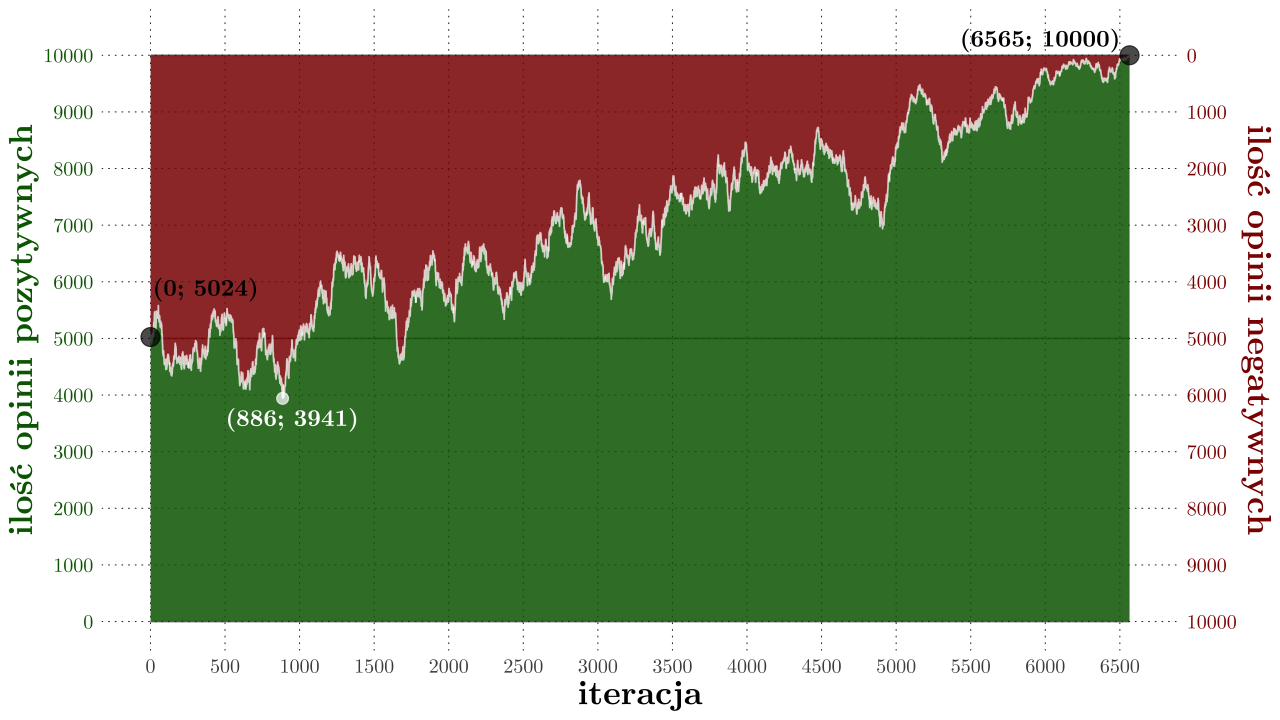

In [338]:
scale <- 1.5
options(repr.plot.width = 16/scale, repr.plot.height = 9/scale)

ggplot() + 
    aes(x = 1:zad1$iter, y = str2int(zad1$evolution)) +
    geom_line(aes(x=1:zad1$iter, y=zad1$L^2/2), alpha=.5)+
    geom_line(aes(x=1:zad1$iter, y=0), alpha=.5)+
     geom_line(aes(x=1:zad1$iter, y=zad1$L^2), alpha=.5)+
    geom_ribbon(aes(ymin = 0, ymax = str2int(zad1$evolution)), fill = "darkgreen", alpha = .85) +
    geom_ribbon(aes(ymin = str2int(zad1$evolution), ymax = zad1$L^2), fill = "darkred", alpha = .85) +
    geom_line(linewidth = .5, color = "white", alpha = .71) +
    geom_point(aes(x=886, y=3941), color = "white", alpha = .71, size=3) +
    geom_point(aes(x=0, y=5024), color = "black", alpha = .71, size=5) +
    geom_point(aes(x=6565, y=10000), color = "black", alpha = .71, size=5) +
    theme_minimal() +
    labs(x = "iteracja", y = "ilość opinii pozytywnych") +
    scale_y_continuous(
        breaks = seq(0, zad1$L^2, by = 1000), 
        limits = c(0, NA),
        sec.axis = sec_axis(~ zad1$L^2 - . , name = "ilość opinii negatywnych", breaks = seq(0, zad1$L^2, by = 1000))
    ) +
    scale_x_continuous(breaks = seq(0, zad1$iter, by = 500)) +
    theme( 
        text = element_text(family = "CMU Serif"),
        axis.text = element_text(size=12),
        axis.text.y.left = element_text(color="darkgreen"), 
        axis.text.y.right = element_text(color="darkred"),
        axis.title = element_text(size = 20, family = "CMU Serif Bold"),
        axis.title.y = element_text(color = "darkgreen"),
        axis.title.y.right = element_text(color = "darkred"),
        panel.grid = element_line(linetype = "dotted", linewidth = 0.25, color = "black"),
        panel.grid.minor = element_blank()
    )+ annotate("text", x=950, y=3600, label = "(886; 3941)",      
           color="white", 
           size=5, family="CMU Serif Bold") +
           annotate("text", x=370, y=5900, label = "(0; 5024)",      
           color="black", 
           size=5, family="CMU Serif Bold") +
           annotate("text", x=6565-600, y=10300, label = "(6565; 10000)",      
           color="black", 
           size=5, family="CMU Serif Bold") 

